In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SVM para clasificación

Vamos a considerar el dataset del vino:

Tenemos 13 features para nuestro vino:



        Alcohol

        Malic acid

        Ash

        Alcalinity of ash

        Magnesium

        Total phenols

        Flavanoids

        Nonflavanoid phenols

        Proanthocyanins

        Color intensity

        Hue

        OD280/OD315 of diluted wines

        Proline


Y tres clases.

In [7]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(X.shape, y.shape)

(178, 13) (178,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

El dataset está más o menos balanceado

In [9]:
print(np.sum(y_train==0)/len(y_train),np.sum(y_train==1)/len(y_train),np.sum(y_train==2)/len(y_train))

0.352112676056338 0.38028169014084506 0.2676056338028169


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

En este caso, tenemos tres clases. Para clasificar, necesitamos definir una estrategia de clasificación. Hay dos posibles estrategias relevantes para `SVC`:



*   Uno contra Todos (One vs Rest): Entrenamos un clasificador por clase. Para el clasificador $k$, los miembros de la clase $k$ son +1 y todo el resto son -1. Por lo tanto, la función de decisión regresa $K$ valores para cada sample, obteniendo una matriz de `(nsamples, nclasses)`. Este es el que usa `LinearSVC`. Tiene el problema de que puede ser inconsistente y que hay que corregir el hecho de que cada clasificador trabaja con datasets desbalanceados. Usualmente, se asigna la clase como la que tiene el máximo valor de $y_{k}$.
*   Uno contra Uno (One vs One): Entrenamos un clasificador para distinguir entre dos clases $i$, $j$ para todas las combinaciones posibles. Para $K$ clases, hay $\frac{K(K-1)}{2}$ combinaciones posibles y por lo tanto la función de decisión va a ser una matriz de dimensión `(nsamples,nclasses*(nclasses-1)/2)`. El orden de las clases de 0 a K-1 es: “0 vs 1”, “0 vs 2” , … “0 vs K-1”, “1 vs 2”, “1 vs 3”, “1 vs K-1”, . . . “K-2 vs K-1”. Utilizando el comando `modelo.decision_function_shape = 'ovr'` podemos transformar nuestra función de decisión en una matriz de `(nsamples, nclasses)`. Este método es el que utiliza `SVC`.



In [16]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
modelo_linear_svc=LinearSVC(penalty='l2', loss='hinge',max_iter=1000,multi_class='ovr',C=1.0)
modelo_linear_svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [53]:
y_pred_linear_svc = modelo_linear_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_linear_svc))
print(accuracy_score(y_test,y_pred_linear_svc))

[[ 9  0  0]
 [ 1 16  0]
 [ 0  0 10]]
0.9722222222222222


In [45]:
linear_sv_index= np.abs(modelo_linear_svc.decision_function(X_train)) <= 1.0 + 1e-12
print(linear_sv_index.shape)

(142, 3)


In [46]:
modelo_svc=SVC(kernel='linear',C=1.0,decision_function_shape='ovr')
modelo_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
print(modelo_svc.decision_function(X_train).shape)
print(modelo_svc.predict(X_train).shape)

(142, 3)
(142,)


In [52]:
y_pred_svc = modelo_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))

[[ 9  0  0]
 [ 1 15  1]
 [ 0  0 10]]
0.9444444444444444


In [49]:
svc_index= np.abs(modelo_svc.decision_function(X_train)) <= 1.0 + 1e-12
print(svc_index.shape)

(142, 3)


Pero son otros support vectors!

In [50]:
np.sum(linear_sv_innp.abs(svc.decision_function(phi)) <= 1.0 + 1e-12
dex == svc_index)/(svc_index.shape[0]*svc_index.shape[1])

0.36619718309859156

Ejercicio: 

Ahora hagan lo mismo pero con el Iris dataset, graficando las fronteras de decisión y los support vectors. Exploren además otros kernels y optimicen los hiperparametros

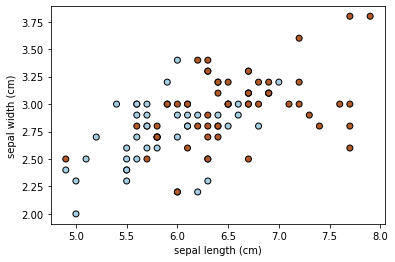

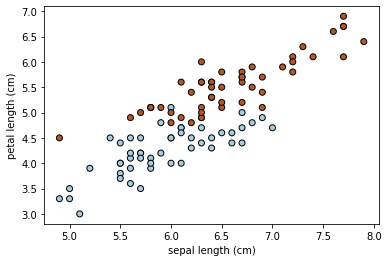

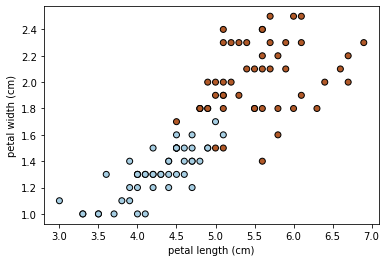

In [51]:
from sklearn import datasets
iris=datasets.load_iris()
X = iris.data
t = iris.target

X = X[t > 0]
t = t[t > 0]

# Plot also the training points
for pair in ([0, 1], [0, 2], [2, 3]):
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c=t, edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.show()

# SVM para regresión

También podemos utilizar Support Vector Machines para Regresión.

In [2]:
from sklearn.svm import LinearSVR, SVR

Mientras que en clasificación la idea era separar las clases con el margen, en regresión se busca lo opuesto: encontrar los margenes dentro de los cuales se encuentra el target. Tenemos entonces dos hiperparametros $C$ que controla el peso relativo de los errores tal como antes y $\epsilon$ que controla el tamaño del margen dentro del cual no nos molesta equivocarnos.

Veamoslo con un ejemplo sencillo:

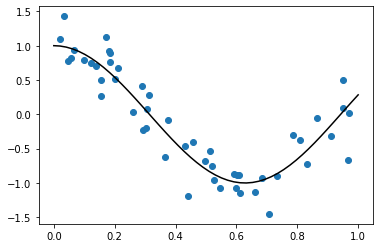

In [66]:
np.random.seed(42)
N = 50
X = np.random.rand(N)
y = np.cos(5*X)+0.3*np.random.randn(N)
xvals=np.linspace(0.0,1.0,50)
plt.plot(xvals,np.cos(5*xvals),color='black')
plt.scatter(X,y)

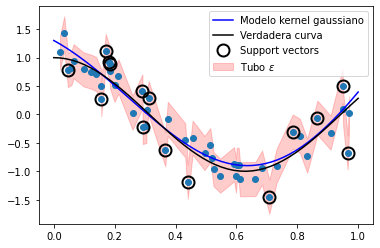

In [103]:
C=100
epsilon=0.3
modelo=SVR(kernel='rbf',gamma='auto',C=C,epsilon=epsilon)
modelo.fit(X.reshape(-1,1),y)
plt.plot(xvals,modelo.predict(xvals.reshape(-1,1)),color='blue', label='Modelo kernel gaussiano')
plt.plot(xvals,np.cos(5*xvals),color='black', label='Verdadera curva')
idsorted=np.argsort(X)
plt.fill_between(X[idsorted],y[idsorted]-epsilon,y[idsorted]+epsilon,color='red',alpha=0.2, label='Tubo $\epsilon$')
plt.scatter(X,y)
isv = modelo.support_
plt.plot(X[isv], y[isv], 'o', ms=12, mfc='None', mec='k', mew=2, label='Support vectors')
plt.legend(loc='upper right')

Exploren los distintos kernels, optimizando los hiperparametros, con el dataset del parcial:

In [3]:
if 'google.colab' in sys.modules:
    #Si estas en Colab, ejecuta esto primero:
    !wget https://raw.githubusercontent.com/IAI-UNSAM/ML-UNSAM/master/datasets/dataset_regression.txt
data = np.loadtxt('dataset_regresion.txt')
X=data[:,:2]
t=data[:,2]

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Longitud')

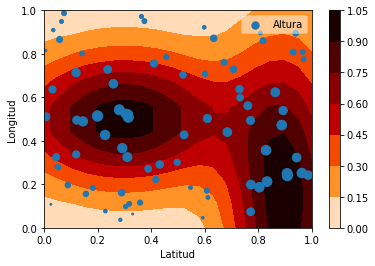

In [4]:
def tfunc(x1,x2):
  r1 = np.sqrt(((x1-0.3)/0.4)**2+((x2-0.5)/0.3)**2)
  r2 = np.sqrt(((x1-0.9)/0.2)**2+((x2-0.1)/0.7)**2)
  return np.exp(-r1**2)+np.exp(-r2**2)
x1=np.linspace(0.0,1.0,20)
x2=np.linspace(0.0,1.0,10)
z=tfunc(x1[np.newaxis,:],x2[:,np.newaxis])
plt.contourf(x1,x2,z,cmap='gist_heat_r')
plt.colorbar()
plt.scatter(X[:,0],X[:,1],s=100*t,label='Altura')
plt.legend(loc='upper right',framealpha=0.5)
plt.xlabel('Latitud')
plt.ylabel('Longitud')

Y la función para graficar a la que hay que agregarle los support vectors:

In [ ]:
x1=np.linspace(0.0,1.0,20)# grilla en latitud
x2=np.linspace(0.0,1.0,10)# grilla en longitud
X1, X2 = np.meshgrid(x1,x2)
elements = np.c_[X1.ravel(),X2.ravel()]# junto todas las combinaciones posibles de mi grilla
z=modelo.predict(elements).reshape(X1.shape)#aca va el modelo
plt.contourf(x1,x2,z,cmap='gist_heat_r')
plt.colorbar()
plt.scatter(X_train[:,0],X_train[:,1],s=100*t_train,label='Altura')
plt.legend(loc='upper right',framealpha=0.5)
plt.xlabel('Latitud')
plt.ylabel('Longitud')